In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import collections
#import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load behavioral data

In [2]:
df = pd.read_csv("/mnt/c/Users/liz/Contacts/Desktop/ValuePercept/Behavior/HCP_behavioralData.csv")
df.shape
df.head()

(1206, 582)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


# Exclude missing values from the data

In [3]:
#Detect missing values in the data
#How many Nulls for each field?
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
type(null_columns)

dMRI_3T_ReconVrs         141
fMRI_3T_ReconVrs         108
7T_fMRI_Mov_Vrs         1022
QC_Issue                1049
MRsession_Scanner_3T      93
                        ... 
Taste_Unadj                6
Taste_AgeAdj               6
Mars_Log_Score             8
Mars_Errs                 11
Mars_Final                11
Length: 470, dtype: int64

pandas.core.indexes.base.Index

In [4]:
#Delete rows with missing values in specific columns
##PicSeq_AgeAdj - episodic memory task (pic seq memory)
df = df.dropna(subset=['DDisc_AUC_200', 'DDisc_AUC_40K', 'Flanker_AgeAdj', 'Mars_Final', 'PicSeq_AgeAdj', 'ListSort_AgeAdj'])
df.shape

(1194, 582)

# Exploration of the behavioral tasks

## Perceptual task - Mars contrast test

count    1194.000000
mean        1.822370
std         0.543105
min         1.080000
25%         1.760000
50%         1.800000
75%         1.840000
max        15.000000
Name: Mars_Final, dtype: float64

<AxesSubplot:xlabel='Mars_Final'>

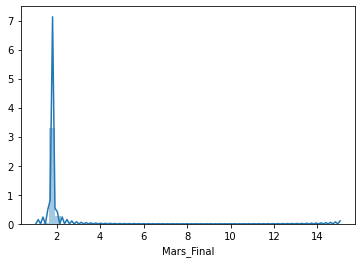

In [5]:
df['Mars_Final'].describe()

sns.distplot(df['Mars_Final'])

In [6]:
#z-score
df['z_score_mars'] = stats.zscore(df['Mars_Final'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_mars'].abs()<=3]
#df.describe

<AxesSubplot:xlabel='z_score_mars'>

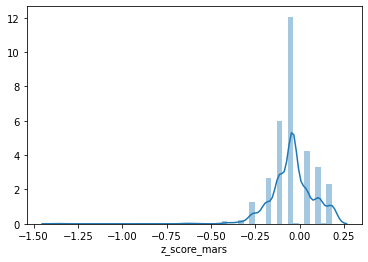

In [7]:
sns.distplot(df['z_score_mars'])

## Value-based task - delay discounting

count    1192.000000
mean        0.257613
std         0.204921
min         0.015692
25%         0.104754
50%         0.199546
75%         0.345933
max         0.984442
Name: DDisc_AUC_200, dtype: float64

<AxesSubplot:xlabel='DDisc_AUC_200'>

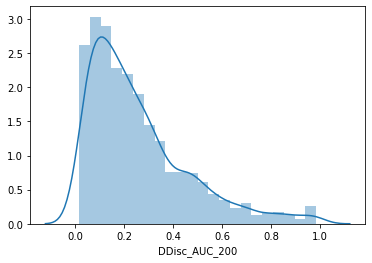

In [8]:
df['DDisc_AUC_200'].describe()

sns.distplot(df['DDisc_AUC_200'])

In [9]:
#z-score
df['z_score_DDisc_AUC'] = stats.zscore(df['DDisc_AUC_40K'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_DDisc_AUC'].abs()<=3]
#df.describe

<AxesSubplot:xlabel='z_score_DDisc_AUC'>

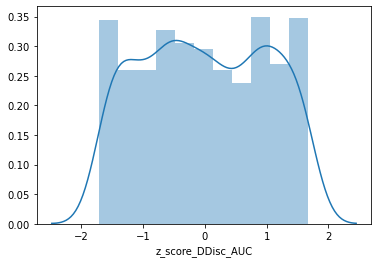

In [10]:
sns.distplot(df['z_score_DDisc_AUC'])

## Perceptual decision-making/selective attention - Flanker task

count    1192.000000
mean      101.409815
std        10.117722
min        69.310000
25%        94.780000
50%       101.655000
75%       108.920000
max       123.560000
Name: Flanker_AgeAdj, dtype: float64

<AxesSubplot:xlabel='Flanker_AgeAdj'>

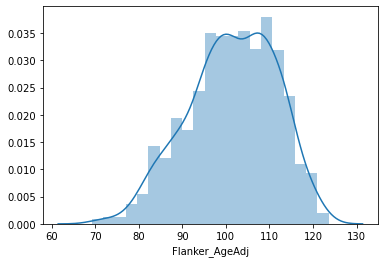

In [11]:
df['Flanker_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['Flanker_AgeAdj'])

<AxesSubplot:xlabel='z_score_Flanker'>

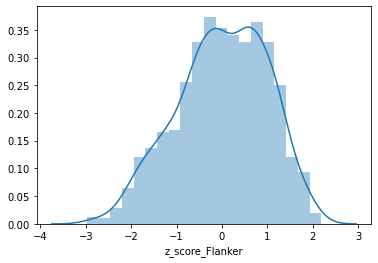

In [12]:
#z-score
df['z_score_Flanker'] = stats.zscore(df['Flanker_AgeAdj'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_Flanker'].abs()<=3]
#df.describe

sns.distplot(df['z_score_Flanker'])

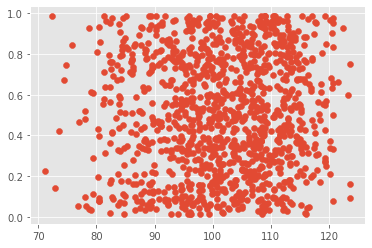

<AxesSubplot:xlabel='Flanker_AgeAdj', ylabel='DDisc_AUC_40K'>

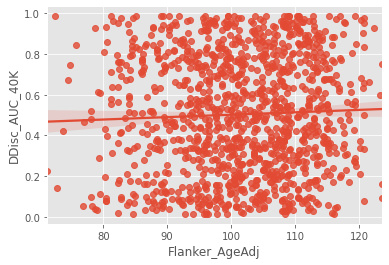

In [13]:
#Correlation between Flanker task and Delay Discount task
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['Flanker_AgeAdj']
y = df['DDisc_AUC_40K']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [14]:
#There is no significant behavioral corr between Flanker task and Delay Discount task
sc.stats.pearsonr(x, y)

(0.04140533958914108, 0.15345159146864443)

# Selective attention/Executive Function/Cognitive Flexibility - CardSort task

count    1187.000000
mean      101.972216
std         9.997156
min        55.390000
25%        95.280000
50%       101.910000
75%       109.645000
max       122.650000
Name: CardSort_AgeAdj, dtype: float64

<AxesSubplot:xlabel='CardSort_AgeAdj'>

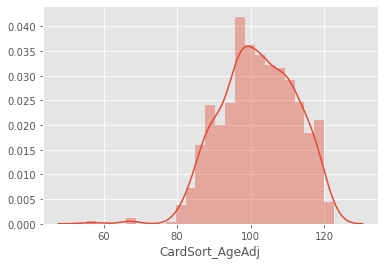

In [15]:
df['CardSort_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['CardSort_AgeAdj'])

# Working memory task - PicSeq_AgeAdj

count    1190.000000
mean      104.815000
std        16.746623
min        50.370000
25%        93.580000
50%       104.600000
75%       116.160000
max       134.810000
Name: PicSeq_AgeAdj, dtype: float64

<AxesSubplot:xlabel='PicSeq_AgeAdj'>

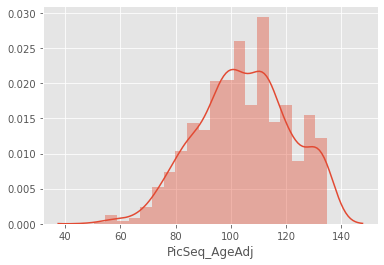

In [16]:
df['PicSeq_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['PicSeq_AgeAdj'])

<AxesSubplot:xlabel='z_score_PicSeq'>

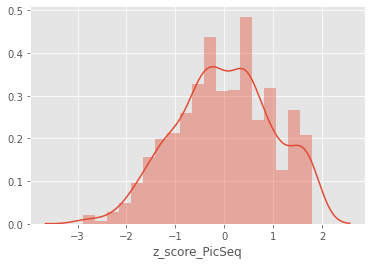

In [17]:
#z-score
df['z_score_PicSeq'] = stats.zscore(df['PicSeq_AgeAdj'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_PicSeq'].abs()<=3]
#df.describe

sns.distplot(df['z_score_PicSeq'])

count    1189.000000
mean      103.061228
std        13.321304
min        60.090000
25%        94.330000
50%       102.630000
75%       112.660000
max       140.860000
Name: ListSort_AgeAdj, dtype: float64

<AxesSubplot:xlabel='ListSort_AgeAdj'>

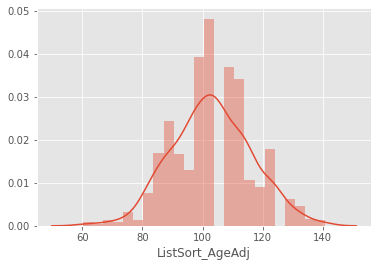

In [18]:
df['ListSort_AgeAdj'].describe()

#Scores distribution
sns.distplot(df['ListSort_AgeAdj'])

<AxesSubplot:xlabel='z_score_LisSort'>

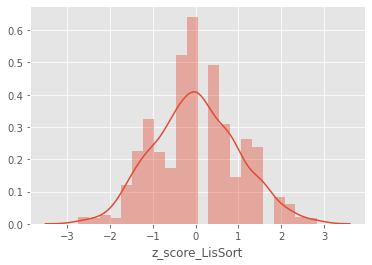

In [19]:
#z-score
df['z_score_LisSort'] = stats.zscore(df['ListSort_AgeAdj'])


#Remove outliers (>3 SD)
df = df.loc[df['z_score_LisSort'].abs()<=3]
#df.describe

sns.distplot(df['z_score_LisSort'])

<AxesSubplot:xlabel='Flanker_AgeAdj', ylabel='ListSort_AgeAdj'>

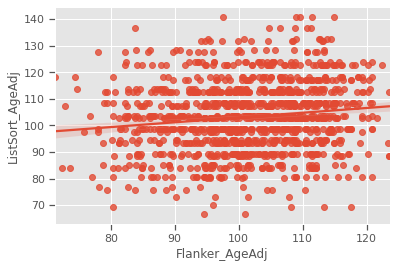

In [47]:
#Correlation between Flanker task and CardSort task
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['Flanker_AgeAdj']
y = df['ListSort_AgeAdj']

#sc.stats.pearsonr(x, y)
sns.regplot(x, y)

In [48]:
sc.stats.pearsonr(x, y)

(0.1377620573108377, 1.935883134197453e-06)

## Comparison between z_scores of Mars Contrast and Delay discount

In [22]:
#correlation
x = df['z_score_DDisc_AUC']
y = df['z_score_mars']
sc.stats.pearsonr(x, y)

(0.07042178393691725, 0.015323586357649075)

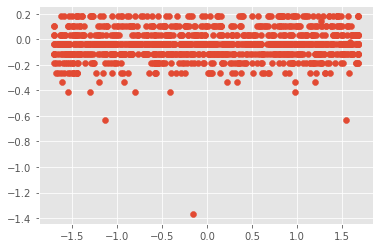

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['z_score_DDisc_AUC']
y = df['z_score_mars']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

In [24]:
#Devide the subjects into 4 groups according to the z-scores in both variables
df['GroupType'] = ""

for index, row in df.iterrows():
    if row['z_score_mars'] < 0.0 and row['z_score_DDisc_AUC'] < 0.0:
        df['GroupType'][index] = 0
        #print(row)
    elif row['z_score_mars'] < 0 and row['z_score_DDisc_AUC'] > 0:
        df['GroupType'][index] = 1
    elif row['z_score_mars'] >= 0 and row['z_score_DDisc_AUC'] >= 0:
        df['GroupType'][index] = 2
    elif row['z_score_mars'] >= 0 and row['z_score_DDisc_AUC'] <= 0:
        df['GroupType'][index]= 3

df['GroupType'].unique()



/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.i

array([0, 3, 2, 1], dtype=object)

In [25]:
#validate if the classification to groups is correct
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,z_score_PicSeq,z_score_LisSort,GroupType
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,105.31,1.80,0.0,1.80,-0.041207,-1.519961,0.949247,0.455507,-1.336860,0
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,72.03,1.84,0.0,1.84,0.032475,-1.580798,1.497031,0.834250,0.038208,3
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,71.76,1.76,0.0,1.76,-0.114888,-0.669161,0.048468,-0.081543,-0.347051,0
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,113.59,1.76,2.0,1.68,-0.262251,-0.285983,1.196442,1.217175,-0.032385,0
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,85.31,1.92,1.0,1.88,0.106156,1.273968,1.262690,-0.186683,0.390424,2
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,123.31,1.80,0.0,1.80,-0.041207,0.975235,-0.897794,-2.079801,-1.430734,1
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,131.38,1.84,0.0,1.84,0.032475,0.282427,-0.516125,-0.444754,1.552211,2
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,102.32,1.92,0.0,1.92,0.179838,1.096907,-1.675963,-0.548102,-0.032385,2
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,104.39,1.80,0.0,1.80,-0.041207,1.556358,0.193819,-0.684306,0.390424,1
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,71.78,1.80,0.0,1.80,-0.041207,-0.578815,-0.082050,0.388002,0.319831,0


GroupType
0    101.575828
1    101.265025
2    102.448298
3    100.503161
Name: Flanker_AgeAdj, dtype: float64


<AxesSubplot:xlabel='GroupType'>

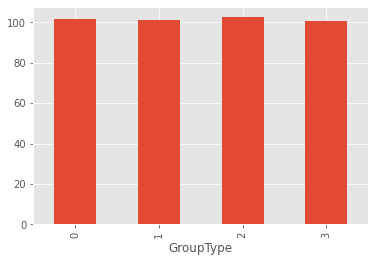

In [26]:
#Show performance in Flanker task according to the 4 groups
FT = df.groupby(['GroupType'])['Flanker_AgeAdj'].mean()
print(FT)
FT.plot(kind='bar')

In [27]:
#from: https://www.pythonfordatascience.org/anova-python/
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Flanker_AgeAdj ~ C(GroupType)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(GroupType),363.611697,3.0,1.199309,0.308777
Residual,119353.596298,1181.0,NaN,NaN


In [28]:
#Create a coloumn that compares between the two z-scores
#df['z_score_compare'] = df['z_score_mars']-df['z_score_DD200']

df['z_score_compare'] = ""

for index, row in df.iterrows():
    df['z_score_compare'][index] = abs(row['z_score_mars'] - row['z_score_DDisc_AUC'])
    
df['z_score_compare']

df.head()

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0         1.47875
1         1.61327
2        0.554273
3       0.0237323
4         1.16781
          ...    
1201      1.57215
1202      1.63129
1203     0.205727
1204     0.537608
1205     0.463739
Name: z_score_compare, Length: 1185, dtype: object

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Mars_Log_Score,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,z_score_PicSeq,z_score_LisSort,GroupType,z_score_compare
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,1.80,0.0,1.80,-0.041207,-1.519961,0.949247,0.455507,-1.336860,0,1.47875
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,1.84,0.0,1.84,0.032475,-1.580798,1.497031,0.834250,0.038208,3,1.61327
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,1.76,0.0,1.76,-0.114888,-0.669161,0.048468,-0.081543,-0.347051,0,0.554273
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,1.76,2.0,1.68,-0.262251,-0.285983,1.196442,1.217175,-0.032385,0,0.0237323
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,1.92,1.0,1.88,0.106156,1.273968,1.262690,-0.186683,0.390424,2,1.16781


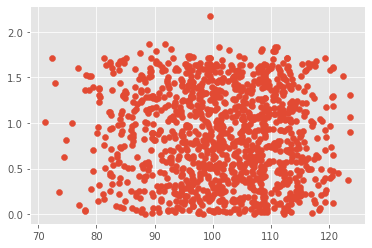

In [29]:
import matplotlib
import matplotlib.pyplot as plt

x = df['Flanker_AgeAdj']
y = df['z_score_compare']

plt.scatter(x, y)
plt.show()

#sns.regplot(x, y)

In [30]:
#correlation
#Negative means that the similar the score in Mars and DD tasks (smaller z_compare), the higher the score in Flanker task
sc.stats.pearsonr(x, y)

(-0.04756927767385133, 0.10169001599482656)

count     1185.000000
unique    1108.000000
top          1.718329
freq         9.000000
Name: z_score_compare, dtype: float64

<AxesSubplot:xlabel='z_score_compare'>

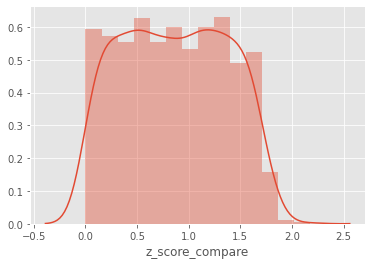

In [31]:
df['z_score_compare'].describe()

#Scores distribution
sns.distplot(df['z_score_compare'])

## Comparison between z_scores of Flanker task and Delay discount

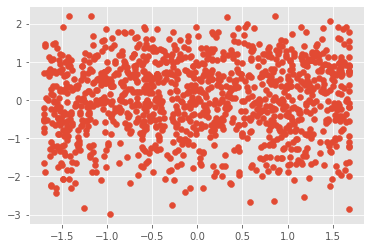

<AxesSubplot:xlabel='z_score_DDisc_AUC', ylabel='z_score_Flanker'>

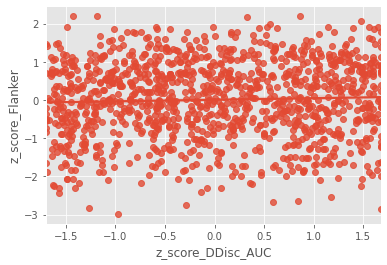

In [32]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = df['z_score_DDisc_AUC']
y = df['z_score_Flanker']

#sc.stats.pearsonr(x, y)

plt.scatter(x, y)
plt.show()

sns.regplot(x, y)

In [33]:
sc.stats.pearsonr(x, y)

(0.041281770972626655, 0.15555462226569589)

In [34]:
#Devide the subjects into 4 groups according to the z-scores in both variables
df['GroupType_f'] = ""

for index, row in df.iterrows():
    if row['z_score_Flanker'] < 0.0 and row['z_score_DDisc_AUC'] < 0.0:
        df['GroupType_f'][index] = 0
        #print(row)
    elif row['z_score_Flanker'] < 0 and row['z_score_DDisc_AUC'] > 0:
        df['GroupType_f'][index] = 1
    elif row['z_score_Flanker'] >= 0 and row['z_score_DDisc_AUC'] >= 0:
        df['GroupType_f'][index] = 2
    elif row['z_score_Flanker'] >= 0 and row['z_score_DDisc_AUC'] <= 0:
        df['GroupType_f'][index]= 3

df['GroupType_f'].unique()

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

array([3, 2, 1, 0], dtype=object)

In [35]:
#validate if the classification to groups is correct
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Mars_Errs,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,z_score_PicSeq,z_score_LisSort,GroupType,z_score_compare,GroupType_f
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,0.0,1.80,-0.041207,-1.519961,0.949247,0.455507,-1.336860,0,1.47875,3
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,0.0,1.84,0.032475,-1.580798,1.497031,0.834250,0.038208,3,1.61327,3
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,0.0,1.76,-0.114888,-0.669161,0.048468,-0.081543,-0.347051,0,0.554273,3
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,1.68,-0.262251,-0.285983,1.196442,1.217175,-0.032385,0,0.0237323,3
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,1.0,1.88,0.106156,1.273968,1.262690,-0.186683,0.390424,2,1.16781,2
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,0.0,1.80,-0.041207,0.975235,-0.897794,-2.079801,-1.430734,1,1.01644,1
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,0.0,1.84,0.032475,0.282427,-0.516125,-0.444754,1.552211,2,0.249953,1
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,0.0,1.92,0.179838,1.096907,-1.675963,-0.548102,-0.032385,2,0.91707,1
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,0.0,1.80,-0.041207,1.556358,0.193819,-0.684306,0.390424,1,1.59756,2
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,0.0,1.80,-0.041207,-0.578815,-0.082050,0.388002,0.319831,0,0.537608,0


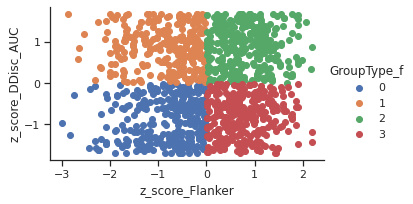

In [36]:
#Plot the classification
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

fg = seaborn.FacetGrid(data=df, hue='GroupType_f', aspect=1.61)
fg.map(pyplot.scatter, 'z_score_Flanker', 'z_score_DDisc_AUC').add_legend()

In [37]:
#Create a coloumn that compares between the two z-scores
#df['z_score_compare'] = df['z_score_mars']-df['z_score_DD200']

df['z_score_compare_f'] = ""

for index, row in df.iterrows():
    df['z_score_compare_f'][index] = abs(row['z_score_Flanker'] - row['z_score_DDisc_AUC'])
    
df['z_score_compare_f']

/home/lizakson/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0         2.46921
1         3.07783
2         0.71763
3         1.48242
4       0.0112785
          ...    
1201      3.10991
1202      1.01705
1203      1.26381
1204     0.758986
1205     0.607925
Name: z_score_compare_f, Length: 1185, dtype: object

In [38]:
df.head(10)

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Mars_Final,z_score_mars,z_score_DDisc_AUC,z_score_Flanker,z_score_PicSeq,z_score_LisSort,GroupType,z_score_compare,GroupType_f,z_score_compare_f
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,1.80,-0.041207,-1.519961,0.949247,0.455507,-1.336860,0,1.47875,3,2.46921
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,1.84,0.032475,-1.580798,1.497031,0.834250,0.038208,3,1.61327,3,3.07783
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,1.76,-0.114888,-0.669161,0.048468,-0.081543,-0.347051,0,0.554273,3,0.71763
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,1.68,-0.262251,-0.285983,1.196442,1.217175,-0.032385,0,0.0237323,3,1.48242
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,1.88,0.106156,1.273968,1.262690,-0.186683,0.390424,2,1.16781,2,0.0112785
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,1.80,-0.041207,0.975235,-0.897794,-2.079801,-1.430734,1,1.01644,1,1.87303
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,1.84,0.032475,0.282427,-0.516125,-0.444754,1.552211,2,0.249953,1,0.798552
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,1.92,0.179838,1.096907,-1.675963,-0.548102,-0.032385,2,0.91707,1,2.77287
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,1.80,-0.041207,1.556358,0.193819,-0.684306,0.390424,1,1.59756,2,1.36254
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,1.80,-0.041207,-0.578815,-0.082050,0.388002,0.319831,0,0.537608,0,0.496764


count     1185.000000
unique    1183.000000
top          0.930575
freq         2.000000
Name: z_score_compare_f, dtype: float64

<AxesSubplot:xlabel='z_score_compare_f'>

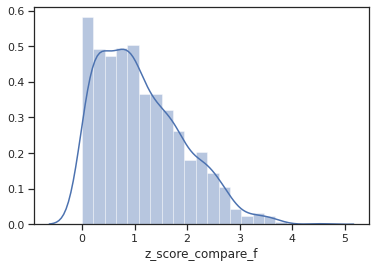

In [39]:
df['z_score_compare_f'].describe()

#Scores distribution
sns.distplot(df['z_score_compare_f'])

In [40]:
#Save to csv
df.to_csv('HCP_behavior_includeZscores_V3.csv')